# Importing libraries & setting common values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def custom_save_fig(fig, fname):
    for ftype in ['.png', '.pdf']:
        fig.savefig('./output/plots/'+ fname + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)
# plt.rcParams.keys()

# Masked Map

## Strip

### STD with internal MAD and measures

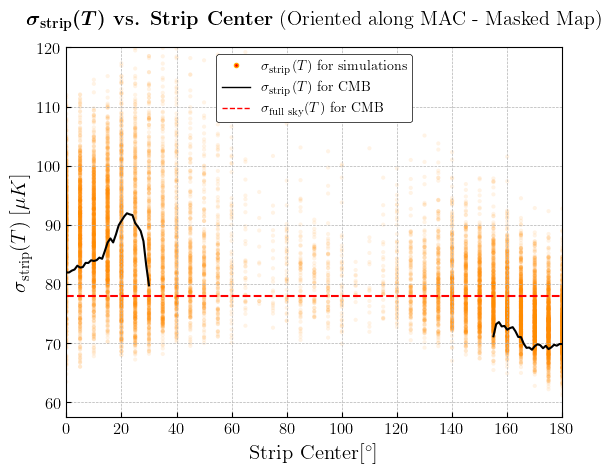

In [7]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_masked_MAD_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_masked_MAD_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_masked_20strip_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_masked_20strip_std_measure_range.txt')
# for full sky value
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')


with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for i, sim_mean in enumerate(sims_internal_measure):
        ax.scatter(sims_sampling_range, sim_mean,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # full sky horizontal line
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # cmb
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.5)
    # labels
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along MAC - Masked Map)',
                 y = 1.04)
    # limits
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 120)
    # legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-',color='k', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1),
        ]
    ax.legend(sample_curves, [
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
            ], loc = 9)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_masked_internal_MAC_scatter_std_20strip')
plt.show()

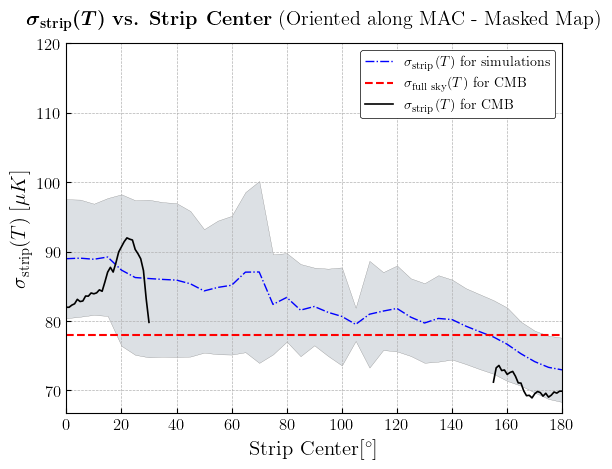

In [8]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_masked_MAD_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_masked_MAD_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_masked_20strip_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_masked_20strip_std_measure_range.txt')
# for full sky value
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')

sim_mean  = np.nanmean(sims_internal_measure, axis=0)
sim_error = np.nanstd(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # One sigma
    fill_col  = (0.1, 0.2, 0.3, 0.15)
    edge_col    = (0, 0, 0, 0.5)
    ax.fill_between(sims_sampling_range, sim_mean - sim_error, sim_mean + sim_error,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # Two sigmas
    # ax.fill_between(sims_sampling_range, sim_mean - sim_error * 2, sim_mean + sim_error * 2,
    #                 color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # simulations
    ax.plot(sims_sampling_range, sim_mean,
            color='blue', linestyle='-.', linewidth=1)
    # Whole sky horizontal line
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # CMB
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.2)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Strip Center} (Oriented along MAC - Masked Map)',
                 y = 1.03)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 120)
    ax.legend([
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_masked_internal_MAC_errorband_std_20strip')
plt.show()

#### DSTD2 with simulations internal values

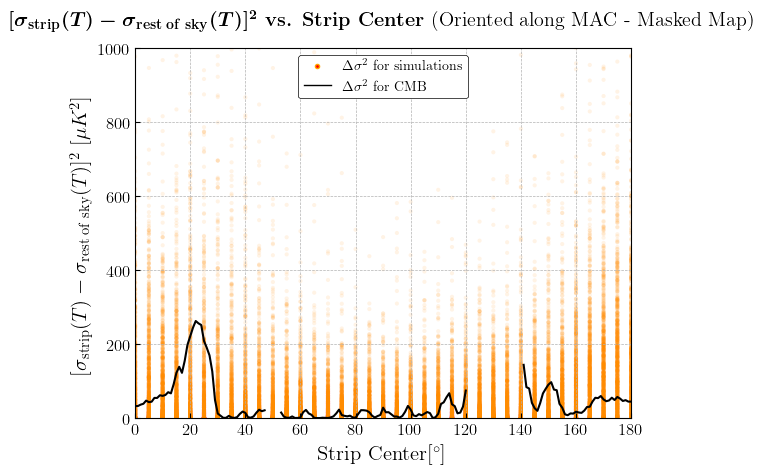

In [2]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_masked_MAD_strip_dstd2_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_masked_MAD_strip_dstd2_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_masked_20strip_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_masked_20strip_dstd2_measure_range.txt')


with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for i, sim_mean in enumerate(sims_internal_measure):
        ax.scatter(sims_sampling_range, sim_mean,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # cmb
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.5)
    # labels
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K^2]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along MAC - Masked Map)',
                 y = 1.04)
    # limits
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 1000)
    # legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-',color='k', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1),
        ]
    ax.legend(sample_curves, [
                r'$\Delta \sigma^2$ for simulations',
                r'$\Delta \sigma^2$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_masked_internal_MAC_scatter_dstd2_20strip')
plt.show()

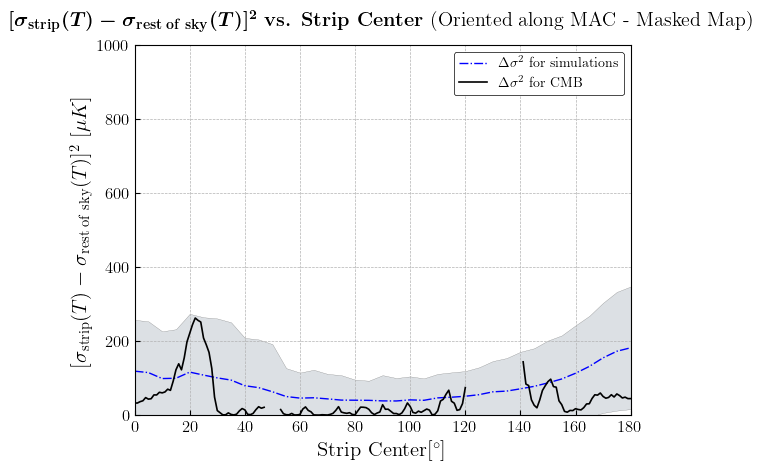

In [3]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_masked_MAD_strip_dstd2_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_masked_MAD_strip_dstd2_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_masked_20strip_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_masked_20strip_dstd2_measure_range.txt')

sim_mean    = np.nanmean(sims_internal_measure, axis=0)
sim_error   = np.nanstd(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # One sigma
    fill_col  = (0.1, 0.2, 0.3, 0.15)
    edge_col    = (0, 0, 0, 0.5)
    ax.fill_between(sims_sampling_range, sim_mean - sim_error, sim_mean + sim_error,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # Two sigmas
    # ax.fill_between(sims_sampling_range, sim_mean - sim_error * 2, sim_mean + sim_error * 2,
    #                 color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # simulations
    ax.plot(sims_sampling_range, sim_mean,
            color='blue', linestyle='-.', linewidth=1)
    # CMB
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.2)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Strip Center} (Oriented along MAC - Masked Map)',
                 y = 1.03)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 1000)
    ax.legend([
                r'$\Delta\sigma^2$ for simulations',
                r'$\Delta\sigma^2$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_masked_internal_MAC_errorband_dstd2_20strip')
plt.show()